In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import scipy.stats as stats

sns.set_style('white')
%matplotlib inline

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

### Load in processed data

In [15]:
df_rel_sort_list = pickle.load(open('pickle_files/rel_sort_lod_list.pkl', 'rb'))
df_abs_sort_list = pickle.load(open('pickle_files/abs_sort_lod_list.pkl', 'rb'))

df_pseudo_rel_sort_list = pickle.load(open('pickle_files/pseudo_rel_sort_lod_list.pkl', 'rb'))
df_pseudo_abs_sort_list = pickle.load(open('pickle_files/pseudo_abs_sort_lod_list.pkl', 'rb'))

df_col_names_list = pickle.load(open('pickle_files/col_names_lod_list.pkl', 'rb'))
df_metadata = pickle.load(open('pickle_files/metadata_comp.pkl', 'rb'))

### Combine sequencing and culture data into one dataframe
Only Escherichia-Shigella, Enterobacteriaceae, Enterococcus, and Aeromonas are used for the sequencing data as these are the major contributors to what should grow on the aerobic MacConkey agar plates.

In [17]:
#Escherichia-Shigella, Enterobacteriaceae, Enterococcus, Aeromonas
df_aerobic_seq = pd.DataFrame(df_abs_sort_list[4][['ASV247', 'ASV255', 'ASV70', 'ASV219']].sum(axis=1))
df_macConkey = df_aerobic_seq.merge(df_metadata[['MacConkey Duodenum']], left_index=True, right_index=True)

# Divide number of copies by averge copy number (7) and log transform
df_macConkey['Log ~CFU/mL (Seq)'] = np.log10((df_macConkey[0]+1)/7)

df_macConkey['Log MacConkey CFU/mL'] = np.log10(df_macConkey['MacConkey Duodenum']+1)

### Scatterplot comparing the two microbial load measurements

C:\Users\Jake\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jake\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(20.75, 0.5, 'Log MacConkey CFU/mL')

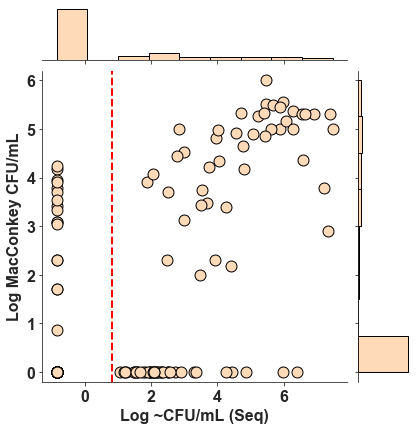

In [18]:
g = sns.JointGrid(x="Log ~CFU/mL (Seq)", y="Log MacConkey CFU/mL", data=df_macConkey)
g = g.plot_joint(plt.scatter, color="Peachpuff", edgecolor="k", s=120)
_ = g.ax_marg_x.hist(df_macConkey["Log ~CFU/mL (Seq)"], color="peachpuff", alpha=1, edgecolor='k',
                      bins=9)
_ = g.ax_marg_y.hist(df_macConkey["Log MacConkey CFU/mL"], color="peachpuff", alpha=1, edgecolor='k',
                      orientation="horizontal",
                      bins=8)

plt.plot([np.log10(45/7), np.log10(45/7)], [-0.2, 6.2], linewidth=2, ls='--', color='red')
plt.ylim(-.2,6.2)
plt.xlabel('Log ~CFU/mL (Seq)', fontsize=16, fontweight='bold')
plt.ylabel('Log MacConkey CFU/mL', fontsize=16, fontweight='bold')

#fig.savefig('aerobic_culture.png', bbox_inches='tight', dpi=200)
#fig.savefig('aerobic_culture.pdf', bbox_inches='tight')

### Correlation between the two microbial load measurements

In [19]:
stats.spearmanr(df_macConkey[0], df_macConkey['MacConkey Duodenum'], nan_policy='omit')

SpearmanrResult(correlation=0.6095803747152866, pvalue=3.2296390922802557e-26)

### Combine sequencing and culture data into one dataframe
Only Prevotella, Streptococcus, Fusobacterium, and Escherichia-Shigella were used for the sequencing data as these are the main contributors to what should grow on the anaerobic blood agar plates.

In [20]:
#Prevotella, Streptococcus, fusobacterium, Escherichia-Shigella
df_anaerobic_seq = pd.DataFrame(df_abs_sort_list[4][['ASV30', 'ASV76', 'ASV247', 'ASV191']].sum(axis=1))
df_anaerobic_seq.index = df_anaerobic_seq.index.astype(int)
df_blood = df_anaerobic_seq.merge(df_metadata[['Blood Duodenum']], left_index=True, right_index=True)

# Divide number of copies by averge copy number (7) and log transform
df_blood['Log ~CFU/mL (Seq)'] = np.log10((df_blood[0]+1)/7)
df_blood['Log Blood CFU/mL'] = np.log10(df_blood['Blood Duodenum']+1)

### Scatterplot comparing the two microbial load measurements

C:\Users\Jake\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jake\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(20.75, 0.5, 'Log An. Blood Agar CFU/mL')

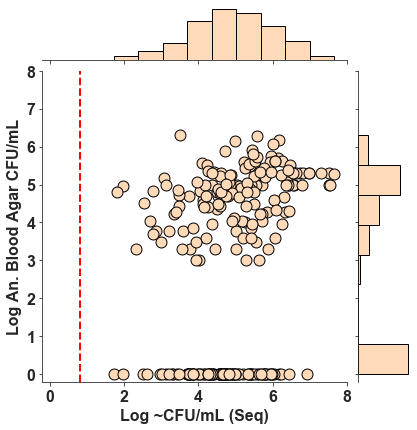

In [21]:
g = sns.JointGrid(x="Log ~CFU/mL (Seq)", y="Log Blood CFU/mL", data=df_blood)
g = g.plot_joint(plt.scatter, color="Peachpuff", edgecolor="k", s=120)
_ = g.ax_marg_x.hist(df_blood["Log ~CFU/mL (Seq)"], color="peachpuff", alpha=1, edgecolor='k',
                      bins=9)
_ = g.ax_marg_y.hist(df_blood["Log Blood CFU/mL"], color="peachpuff", alpha=1, edgecolor='k',
                      orientation="horizontal",
                      bins=8)

plt.plot([np.log10(45/7), np.log10(45/7)], [-0.2, 8], linewidth=2, ls='--', color='red')
plt.ylim(-.2,8)
plt.xlim(-.2,8)
plt.xlabel('Log ~CFU/mL (Seq)', fontsize=16, fontweight='bold')
plt.ylabel('Log An. Blood Agar CFU/mL', fontsize=16, fontweight='bold')

#fig.savefig('anaerobic_culture.png', bbox_inches='tight', dpi=200)
#fig.savefig('anaerobic_culture.pdf', bbox_inches='tight')

### Correlation between the two microbial load measurements

In [22]:
stats.spearmanr(df_blood[0], df_blood['Blood Duodenum'], nan_policy='omit')

SpearmanrResult(correlation=0.3491680823060057, pvalue=2.100283250830443e-08)